#### Imports

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load all init and final weights

In [28]:
def load_dict(npz_path):
    data = np.load(npz_path, allow_pickle=True)
    data = {key: data[key] for key in data.files}
    return data['arr_0'].ravel()[0]

In [29]:
weights_init_conventional_wave = load_dict('wave_recon_weights_init_conventional.npz')
weights_init_rectified_wave = load_dict('wave_recon_weights_init_rectified.npz')
weights_init_dales_wave = load_dict('wave_recon_weights_init_dales.npz')

In [30]:
weights_final_conventional_wave = load_dict('wave_recon_weights_final_conventional.npz')
weights_final_rectified_wave = load_dict('wave_recon_weights_final_rectified.npz')
weights_final_dales_wave = load_dict('wave_recon_weights_final_dales.npz')

In [31]:
weights_init_conventional_mnist = load_dict('seq_mnist_weights_init_conventional.npz')
weights_init_rectified_mnist = load_dict('seq_mnist_weights_init_rectified.npz')
weights_init_dales_mnist = load_dict('seq_mnist_weights_init_dales.npz')

In [32]:
weights_final_conventional_mnist = load_dict('seq_mnist_weights_final_conventional.npz')
weights_final_rectified_mnist = load_dict('seq_mnist_weights_final_rectified.npz')
weights_final_dales_mnist = load_dict('seq_mnist_weights_final_dales.npz')

In [33]:
weights_init_conventional_flip = load_dict('seq_mnist_weights_init_conventional.npz')
weights_init_rectified_flip = load_dict('seq_mnist_weights_init_rectified.npz')
weights_init_dales_flip = load_dict('seq_mnist_weights_init_dales.npz')

In [34]:
weights_final_conventional_flip = load_dict('flipflop_weights_final_conventional.npz')
weights_final_rectified_flip = load_dict('flipflop_weights_final_rectified.npz')
weights_final_dales_flip = load_dict('flipflop_weights_final_dales.npz')

In [49]:
weights_final_conventional_mnist.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [70]:
def aa(*dicts):
    return len(dicts)

aa(weights_final_conventional_mnist, weights_final_conventional_wave, weights_final_conventional_flip)

3

In [84]:
def concatenate_across_tasks(*dicts):
    ndicts = len(dicts)
    keys = list(dicts[0].keys())
    n = len(keys)
    num_conns = np.prod(dicts[0][keys[0]].shape)
    reshaped_dict = np.zeros((n,num_conns*ndicts))
    
    runs_weights = {}
    
    for ii, key in enumerate(keys):
        runs_weights[key] = np.sort(np.array([dicts[jj][key].ravel() for jj in range(ndicts)]).ravel())
    return runs_weights

In [87]:
run_weights_init_conventional = concatenate_across_tasks(weights_init_conventional_flip,
                                                         weights_init_conventional_wave,
                                                         weights_init_conventional_mnist)
run_weights_init_dales = concatenate_across_tasks(weights_init_dales_flip,
                                                         weights_init_dales_wave,
                                                         weights_init_dales_mnist)
run_weights_init_rectified = concatenate_across_tasks(weights_init_rectified_flip,
                                                         weights_init_rectified_wave,
                                                         weights_init_rectified_mnist)

In [88]:
run_weights_final_conventional = concatenate_across_tasks(weights_final_conventional_flip,
                                                         weights_final_conventional_wave,
                                                         weights_final_conventional_mnist)
run_weights_final_dales = concatenate_across_tasks(weights_final_dales_flip,
                                                         weights_final_dales_wave,
                                                         weights_final_dales_mnist)
run_weights_final_rectified = concatenate_across_tasks(weights_final_rectified_flip,
                                                         weights_final_rectified_wave,
                                                         weights_final_rectified_mnist)

In [136]:
def get_kdeplot_xs_ys(w_dict):
    keys = list(w_dict.keys())
    xs, ys = {}, {}
    for ii, key in enumerate(keys):
        xs[ii], ys[ii] = sns.kdeplot(w_dict[key]).lines[-1].get_xdata(), sns.kdeplot(w_dict[key]).lines[-1].get_ydata()
    return xs, ys

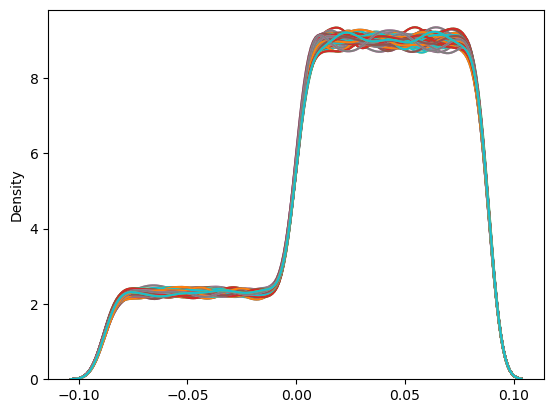

In [137]:
xs_init_conventional, ys_init_conventional = get_kdeplot_xs_ys(run_weights_init_conventional)
xs_init_dales, ys_init_dales = get_kdeplot_xs_ys(run_weights_init_dales)
xs_init_rectified, ys_init_rectified = get_kdeplot_xs_ys(run_weights_init_rectified)

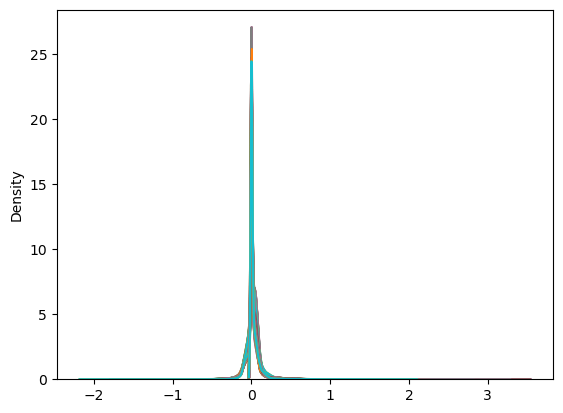

In [138]:
xs_final_conventional, ys_final_conventional = get_kdeplot_xs_ys(run_weights_final_conventional)
xs_final_dales, ys_final_dales = get_kdeplot_xs_ys(run_weights_final_dales)
xs_final_rectified, ys_final_rectified = get_kdeplot_xs_ys(run_weights_final_rectified)

In [139]:
def mean_var_points(xs, ys):
    keys = list(xs.keys())
    n = len(keys)
    num = len(xs[keys[0]])
    
    mean_xs = np.zeros(num)
    mean_ys = np.zeros(num)
    vars_ys = np.zeros(num)

    xs_np = np.zeros((n,num))
    ys_np = np.zeros((n,num))
    
    for ii, key in enumerate(keys):
        xs_np[ii] = xs[key]
        ys_np[ii] = ys[key]
        
    return np.mean(xs_np,0), np.mean(ys_np,0), np.std(ys_np,0)

In [140]:
tick_init_conventional, mean_init_conventional, dev_init_conventional = mean_var_points(xs_init_conventional, ys_init_conventional)
tick_init_dales, mean_init_dales, dev_init_dales = mean_var_points(xs_init_dales, ys_init_dales)
tick_init_rectified, mean_init_rectified, dev_init_rectified = mean_var_points(xs_init_rectified, ys_init_rectified)

In [146]:
tick_final_conventional, mean_final_conventional, dev_final_conventional = mean_var_points(xs_final_conventional, ys_final_conventional)
tick_final_dales, mean_final_dales, dev_final_dales = mean_var_points(xs_final_dales, ys_final_dales)
tick_final_rectified, mean_final_rectified, dev_final_rectified = mean_var_points(xs_final_rectified, ys_final_rectified)

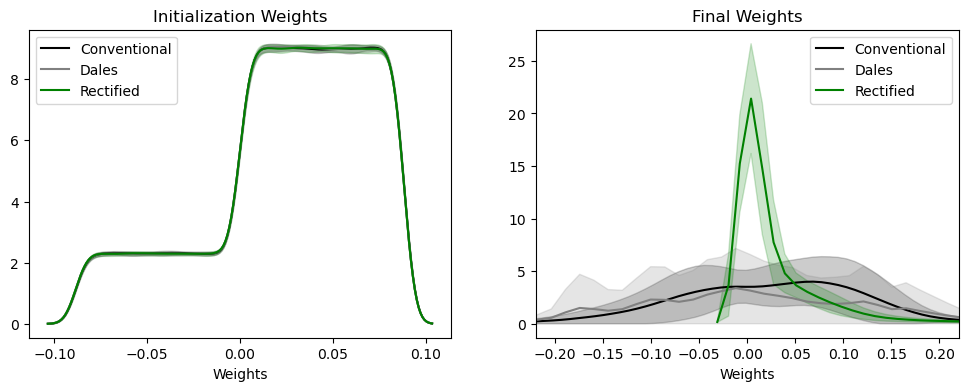

In [151]:
import numpy as np

fweight_dists = plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.plot(tick_init_conventional, mean_init_conventional,
         color='k', label='Conventional')
# clamp lower = mean - dev to 0
lower = np.clip(mean_init_conventional - dev_init_conventional,
                a_min=0, a_max=None)
upper = mean_init_conventional + dev_init_conventional
plt.fill_between(tick_init_conventional,
                 lower,
                 upper,
                 color='k',
                 alpha=0.2)

plt.plot(tick_init_dales, mean_init_dales, color='grey',
         label='Dales')
lower = np.clip(mean_init_dales - dev_init_dales, 0, None)
upper = mean_init_dales + dev_init_dales
plt.fill_between(tick_init_dales,
                 lower,
                 upper,
                 color='grey',
                 alpha=0.2)

plt.plot(tick_init_rectified, mean_init_rectified,
         color='g', label='Rectified')
lower = np.clip(mean_init_rectified - dev_init_rectified, 0, None)
upper = mean_init_rectified + dev_init_rectified
plt.fill_between(tick_init_rectified,
                 lower,
                 upper,
                 color='g',
                 alpha=0.2)

plt.xlabel('Weights')
plt.title('Initialization Weights')
plt.legend()


plt.subplot(122)
plt.plot(tick_final_conventional, mean_final_conventional,
         color='k', label='Conventional')
lower = np.clip(mean_final_conventional - dev_final_conventional,
                a_min=0, a_max=None)
upper = mean_final_conventional + dev_final_conventional
plt.fill_between(tick_final_conventional,
                 lower,
                 upper,
                 color='k',
                 alpha=0.2)

plt.plot(tick_final_dales, mean_final_dales, color='grey',
         label='Dales')
lower = np.clip(mean_final_dales - dev_final_dales, 0, None)
upper = mean_final_dales + dev_final_dales
plt.fill_between(tick_final_dales,
                 lower,
                 upper,
                 color='grey',
                 alpha=0.2)

plt.plot(tick_final_rectified, mean_final_rectified,
         color='g', label='Rectified')
lower = np.clip(mean_final_rectified - dev_final_rectified,
                a_min=0, a_max=None)
upper = mean_final_rectified + dev_final_rectified
plt.fill_between(tick_final_rectified,
                 lower,
                 upper,
                 color='g',
                 alpha=0.2)

plt.xlabel('Weights')
plt.xlim(-0.22, 0.22)
plt.title('Final Weights')
plt.legend()

In [152]:
fweight_dists.savefig('weight_dists_all_errors.svg', dpi=250)
fweight_dists.savefig('weight_dists_all_errors.png', dpi=250)